<a href="https://colab.research.google.com/github/rishav-eulb/FSM/blob/main/Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install numpy
!pip install pandas
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Naive Bayes Accuracy: 0.73
K-Nearest Neighbors Accuracy: 0.72


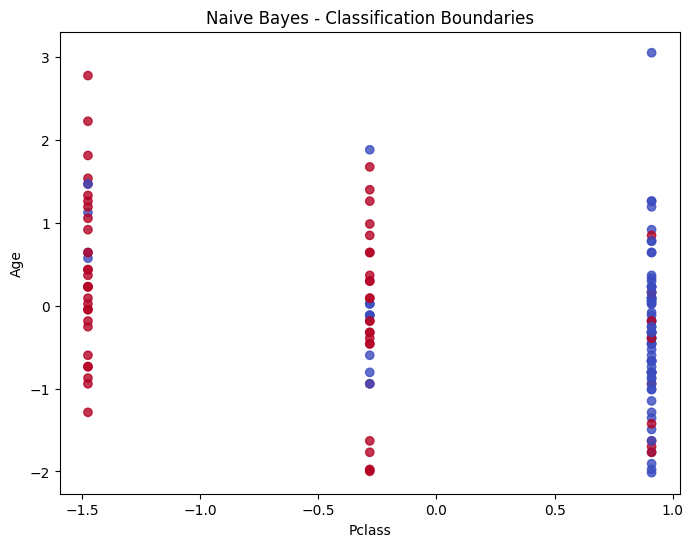

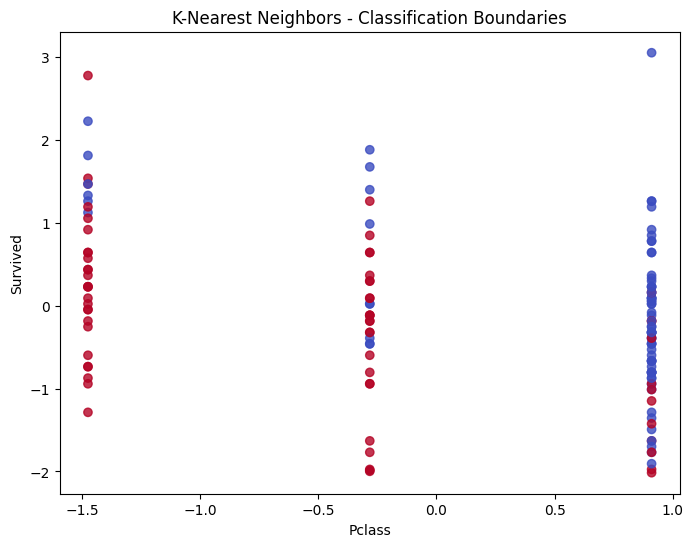

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


class NaiveBayes:
    def __init__(self):
        self.classes = None
        self.class_priors = None
        self.feature_probabilities = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        num_classes = len(self.classes)
        num_features = X.shape[1]

        self.class_priors = np.zeros(num_classes)
        self.feature_probabilities = []

        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.class_priors[i] = X_c.shape[0] / X.shape[0]
            feature_prob = []
            for j in range(num_features):
                feature_values = X_c[:, j]
                unique_values, value_counts = np.unique(feature_values, return_counts=True)
                feature_prob.append(dict(zip(unique_values, value_counts / len(feature_values))))
            self.feature_probabilities.append(feature_prob)

    def predict(self, X):
        y_pred = []

        for x in X:
            class_scores = []
            for i, c in enumerate(self.classes):
                class_score = np.log(self.class_priors[i])
                for j, feature_value in enumerate(x):
                    if feature_value in self.feature_probabilities[i][j]:
                        class_score += np.log(self.feature_probabilities[i][j][feature_value])
                    else:
                        class_score += np.log(1e-10)  # small constant for unseen values
                class_scores.append(class_score)
            y_pred.append(self.classes[np.argmax(class_scores)])

        return np.array(y_pred)


class KNearestNeighbors:
    def __init__(self, k):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])

        for i, x in enumerate(X):
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_indices]
            y_pred[i] = np.bincount(k_nearest_labels).argmax()

        return y_pred


# Load Titanic dataset
titanic_dataset = pd.read_csv('train.csv')

# Preprocess the dataset (considering only numerical features)
selected_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
titanic_dataset = titanic_dataset[selected_features + ['Survived']].dropna()

# Normalize the features
titanic_dataset[selected_features] = (titanic_dataset[selected_features] - titanic_dataset[selected_features].mean()) / \
                                     titanic_dataset[selected_features].std()

# Split the dataset into features (X) and target (y)
X = titanic_dataset[selected_features].values
y = titanic_dataset['Survived'].values

# Split the data into training and testing sets (80% training, 20% testing)
split_ratio = 0.8
split_idx = int(split_ratio * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Apply Naive Bayes Algorithm
naive_bayes = NaiveBayes()
naive_bayes.fit(X_train, y_train)
y_pred_nb = naive_bayes.predict(X_test)

# Apply K-Nearest Neighbors Algorithm
knn = KNearestNeighbors(k=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate performance
accuracy_nb = np.sum(y_pred_nb == y_test) / len(y_test)
accuracy_knn = np.sum(y_pred_knn == y_test) / len(y_test)
print(f'Naive Bayes Accuracy: {accuracy_nb:.2f}')
print(f'K-Nearest Neighbors Accuracy: {accuracy_knn:.2f}')

# Plot classification boundaries for Naive Bayes
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_nb, cmap='coolwarm', alpha=0.8)
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Naive Bayes - Classification Boundaries')
plt.show()

# Plot classification boundaries for K-Nearest Neighbors
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_knn, cmap='coolwarm', alpha=0.8)
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.title('K-Nearest Neighbors - Classification Boundaries')
plt.show()
